1. Import Libraries & Load Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load dataset
df = pd.read_csv("startup_funding.csv")

# Display first few rows
print(df.head())

   Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0      1      09/01/2020                        BYJU’S               E-Tech   
1      2      13/01/2020                        Shuttl       Transportation   
2      3      09/01/2020                     Mamaearth           E-commerce   
3      4      02/01/2020  https://www.wealthbucket.in/              FinTech   
4      5      02/01/2020                        Fashor  Fashion and Apparel   

                             SubVertical City  Location  \
0                             E-learning      Bengaluru   
1              App based shuttle service        Gurgaon   
2  Retailer of baby and toddler products      Bengaluru   
3                      Online Investment      New Delhi   
4            Embroiled Clothes For Women         Mumbai   

              Investors Name       InvestmentnType Amount in USD Remarks  
0    Tiger Global Management  Private Equity Round  20,00,00,000     NaN  
1  Susquehanna Growt

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB
None


2. Basic Data Cleansing

In [11]:
# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Drop duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.fillna({
    "CityLocation": "Unknown",
    "InvestorsName": "Undisclosed",
    "Amount in USD": 0
})

# Convert AmountInUSD to numeric (remove commas/strings)
df["Amount in USD"] = (
    df["Amount in USD"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
)
df["Amount in USD"] = pd.to_numeric(df["Amount in USD"], errors="coerce").fillna(0)


3. Quick Exploration

In [15]:
print("Total funding raised (USD):", df["Amount in USD"].sum())
print("Number of unique startups:", df["Startup Name"].nunique())
print("Top 5 cities:", df["City  Location"].value_counts().head())

Total funding raised (USD): 38057737864.22
Number of unique startups: 2459
Top 5 cities: City  Location
Bangalore    700
Mumbai       567
New Delhi    421
Gurgaon      287
Bengaluru    141
Name: count, dtype: int64


4. Visualizations

(a) Funding by City

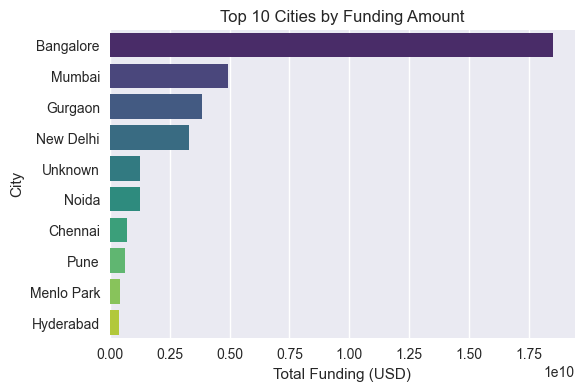

In [37]:
# Convert "Amount in USD" to numeric values, coercing errors to NaN
df["Amount in USD"] = pd.to_numeric(df["Amount in USD"], errors='coerce')

# Now perform the groupby operation
top_cities = df.groupby("City  Location")["Amount in USD"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette="viridis",legend=False)  
plt.title("Top 10 Cities by Funding Amount")
plt.xlabel("Total Funding (USD)")
plt.ylabel("City")
plt.show()





b) Funding by Industry

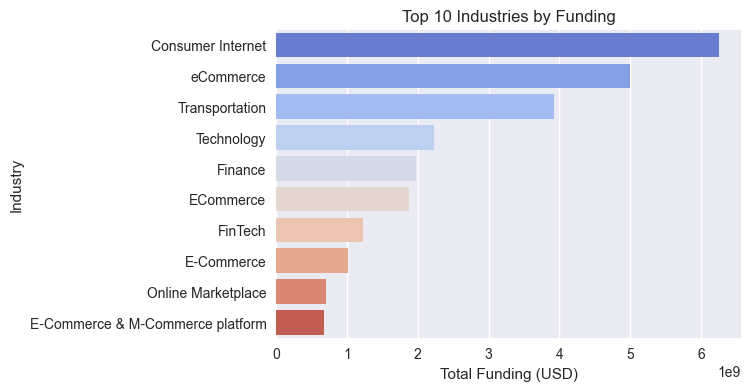

In [38]:
top_sectors = df.groupby("Industry Vertical")["Amount in USD"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(x=top_sectors.values, y=top_sectors.index,hue=top_sectors.index, palette="coolwarm",legend=False)
plt.title("Top 10 Industries by Funding")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Industry")
plt.show()


(c) Funding Trend Over Years

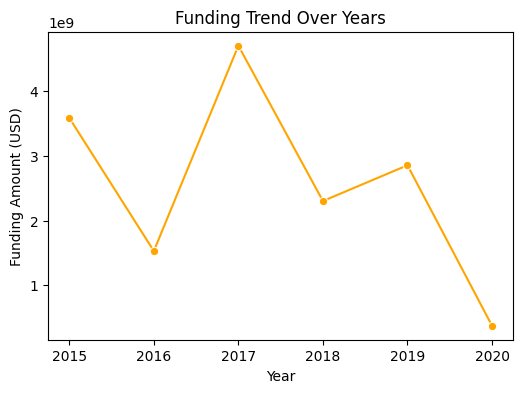

In [29]:
df["Date dd/mm/yyyy"] = pd.to_datetime(df["Date dd/mm/yyyy"], errors="coerce")
df["Year"] = df["Date dd/mm/yyyy"].dt.year

yearly_funding = df.groupby("Year")["Amount in USD"].sum()

plt.figure(figsize=(6,4))
sns.lineplot(x=yearly_funding.index, y=yearly_funding.values, marker="o", color="orange")
plt.title("Funding Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Funding Amount (USD)")
plt.show()


(d) Top Investors

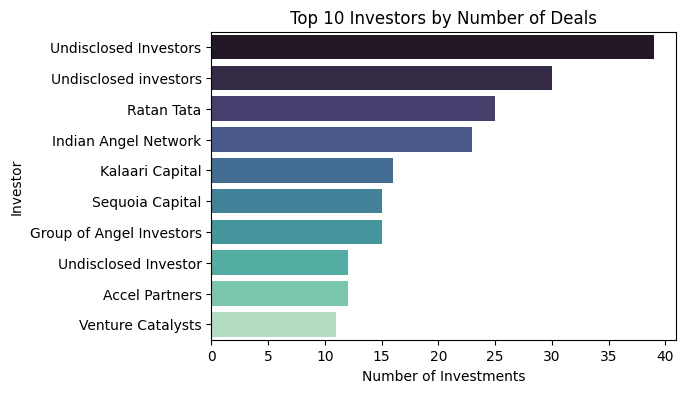

In [33]:
top_investors = df["Investors Name"].value_counts().head(10)

plt.figure(figsize=(6,4))
sns.barplot(x=top_investors.values, y=top_investors.index,hue=top_investors.index,palette="mako", legend=False)
plt.title("Top 10 Investors by Number of Deals")
plt.xlabel("Number of Investments")
plt.ylabel("Investor")
plt.show()


(e) Pie Chart of Funding by Industry

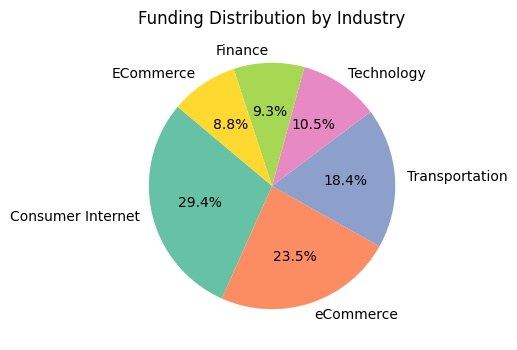

In [34]:
sector_funding = df.groupby("Industry Vertical")["Amount in USD"].sum().sort_values(ascending=False).head(6)

plt.figure(figsize=(6,4))
plt.pie(sector_funding, labels=sector_funding.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Funding Distribution by Industry")
plt.show()


6. Distribution of Funding Amounts

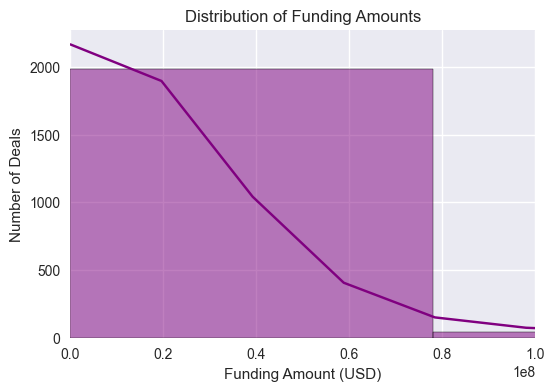

In [50]:
plt.figure(figsize=(6,4))
sns.histplot(df["Amount in USD"], bins=50, kde=True, color="purple")
plt.xlim(0, 1e8)  # To avoid extreme outliers
plt.title("Distribution of Funding Amounts")
plt.xlabel("Funding Amount (USD)")
plt.ylabel("Number of Deals")
plt.show()


7. Top 10 Most Funded Startups

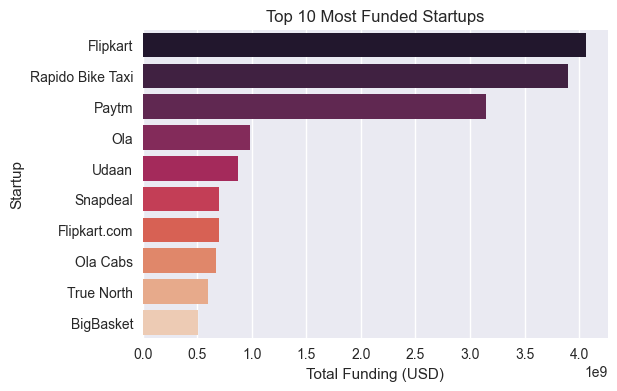

In [55]:
top_startups = df.groupby("Startup Name")["Amount in USD"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(x=top_startups.values, y=top_startups.index,hue=top_startups.index,legend=False, palette="rocket")
plt.title("Top 10 Most Funded Startups")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Startup")
plt.show()


8. Funding Stages Analysis

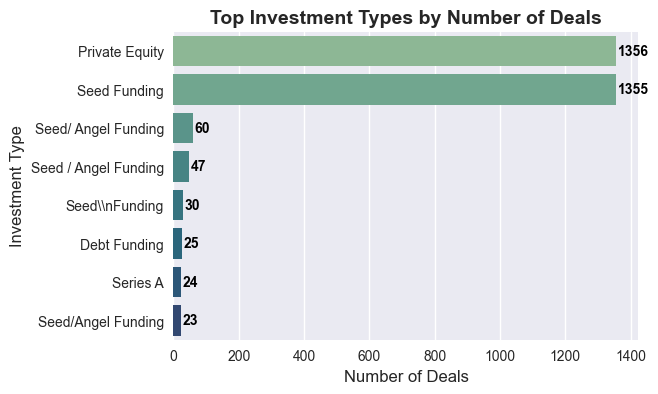

In [56]:
plt.figure(figsize=(6,4))

# Top 8 Investment Types by frequency
top_investment_types = df["InvestmentnType"].value_counts().head(8)

sns.barplot(
    y=top_investment_types.index,
    x=top_investment_types.values,
    palette="crest",
    hue=top_investment_types.index,
    legend=False
)

# Add labels
for i, v in enumerate(top_investment_types.values):
    plt.text(v + 5, i, str(v), color="black", va="center", fontweight="bold")

plt.title("Top Investment Types by Number of Deals", fontsize=14, fontweight="bold")
plt.xlabel("Number of Deals", fontsize=12)
plt.ylabel("Investment Type", fontsize=12)
plt.show()


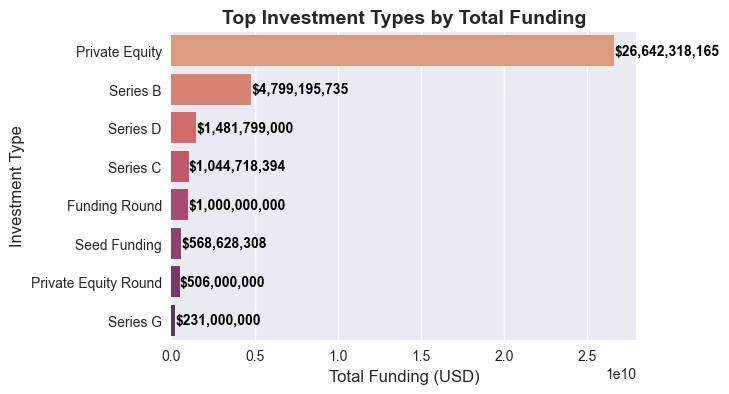

In [57]:
plt.figure(figsize=(6,4))

# Group by Investment Type & sum funding
investment_funding = (
    df.groupby("InvestmentnType")["Amount in USD"]
    .sum()
    .sort_values(ascending=False)
    .head(8)  # Top 8
)

sns.barplot(
    y=investment_funding.index,
    x=investment_funding.values,
    palette="flare",
    hue=investment_funding.index,
    legend=False
)

# Add labels
for i, v in enumerate(investment_funding.values):
    plt.text(v + 5e6, i, f"${v:,.0f}", color="black", va="center", fontweight="bold")

plt.title("Top Investment Types by Total Funding", fontsize=14, fontweight="bold")
plt.xlabel("Total Funding (USD)", fontsize=12)
plt.ylabel("Investment Type", fontsize=12)
plt.show()
